## Classification Mondeling on Adult Income Dataset

Frame the clear problem statement. Identify the independent variables and target feature. ● Is it a binary classification or multiclass classification? Provide the category along with justification. 

The goal is to predict whether an individual's income is above or below $50K based on various demographic and employment-related attributes.

The dataset contains 15 independent variables, including:
- Numerical features: age, fnlwgt, education_num, capital_gain, capital loss, hours_per_week

- Categorical featrues: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('C:/Users/adult_income.csv')

In [8]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
# 48842 rows and 15 columns
data.shape

(48842, 15)

In [11]:
# missing values
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

Observation: Missing values are found. workclass has 2799 missing values, occupation has 2809 missing values, and native_country has 857 missing values.

In [13]:
data.duplicated().sum()

52

In [14]:
# dropping duplicate
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
# 52 rows are successfully removed
data.shape

(48790, 15)

In [17]:
# handling workclass missing values
data[data['workclass'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [18]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])


In [19]:
data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

In [20]:
# handling occupation missing values
data[data['occupation'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,Private,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,Private,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Private,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Private,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,Private,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,Private,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,Private,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,Private,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [21]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [22]:
data['occupation'] = data['occupation'].fillna('Unknown')

In [23]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

In [24]:
# handling native country missing values
data[data['native_country'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48245,46,Private,31411,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,NaN,<=50K
48272,24,Private,127159,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,24,NaN,<=50K
48604,24,State-gov,161783,Bachelors,13,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,NaN,<=50K
48651,34,Private,143776,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,>50K


In [25]:
data['native_country'] = data['native_country'].fillna('Unknown')

In [26]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Observation: I chose 'mode imputation' method since it contains categorical values and i replaced it with the most common genre. I chose to replace occupation and native country's missing value with 'unknown' because we should have no false assumptioms about person's origin and to avoid data bias.

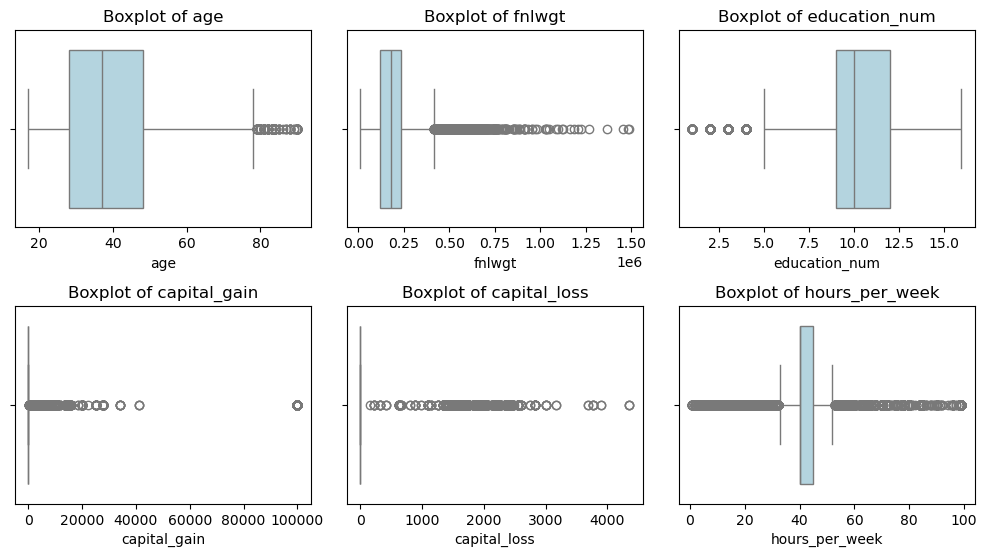

In [28]:
# finding outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

# select only numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

# create box plots for all numerical features
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
           
plt.tight_layout()
plt.show()


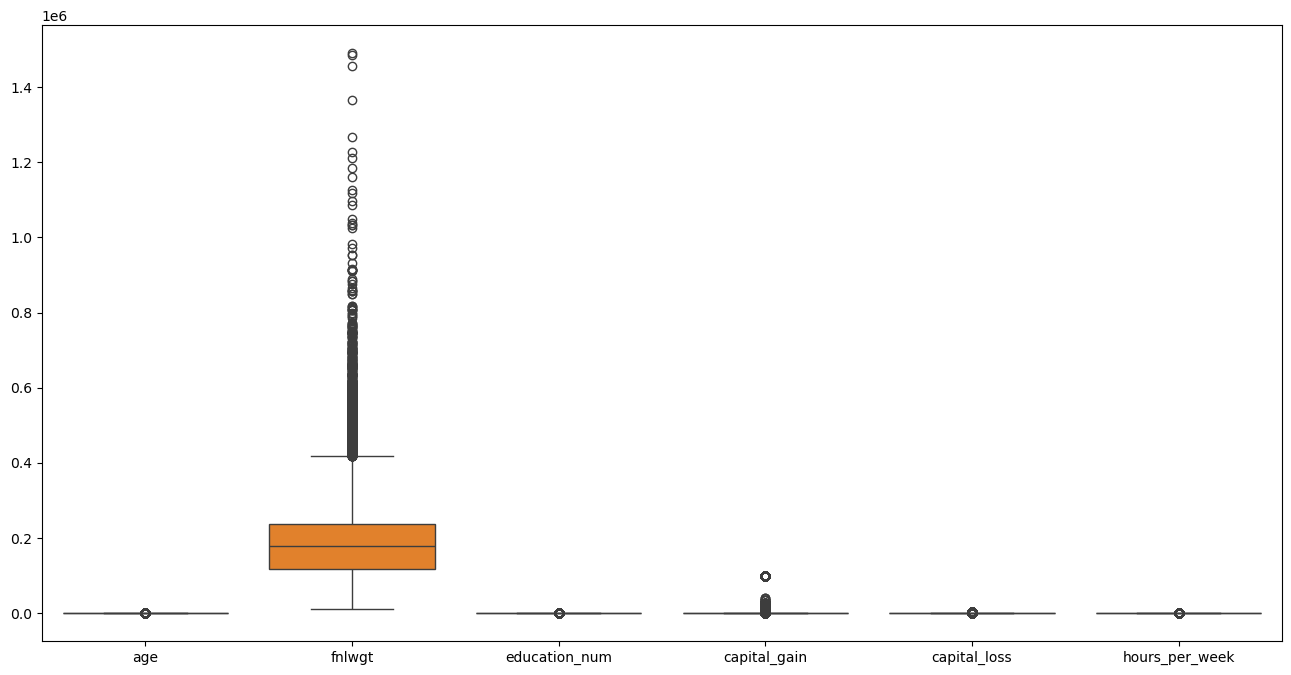

In [29]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

In [30]:
# detect outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# check outliers for each numerical column
for col in numerical_cols:
    outliers = find_outliers_iqr(data, col)
    print(f"Column: {col} - Outliers Found: {len(outliers)}")


Column: age - Outliers Found: 215
Column: fnlwgt - Outliers Found: 1453
Column: education_num - Outliers Found: 1787
Column: capital_gain - Outliers Found: 4035
Column: capital_loss - Outliers Found: 2282
Column: hours_per_week - Outliers Found: 13486


In [31]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

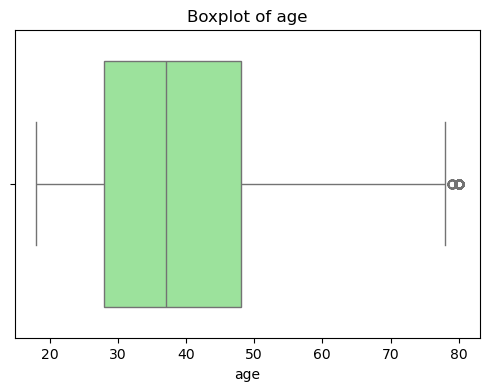

In [32]:
# handling age outliers using capping
data['age'] = data['age'].clip(lower=18, upper=80)

plt.figure(figsize=(6,4))
sns.boxplot(x = data['age'], color='lightgreen')
plt.title('Boxplot of age')
plt.show()

Observation: I chose Capping for age outliers, and the range to clip was chosen based on the IQR method (18 to 80). The extreme high values in line with the rest of the data.

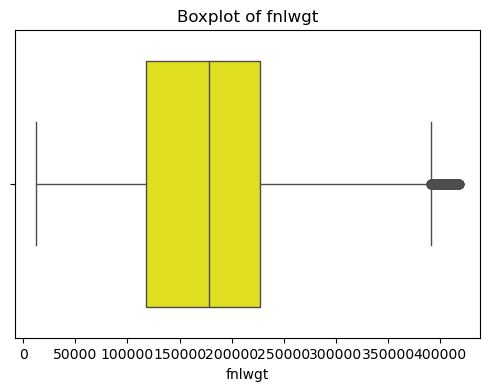

In [34]:
# handling fnlwgt using median imputation

import pandas as pd
import numpy as np

Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_value = data['fnlwgt'].median()
data['fnlwgt'] = data['fnlwgt'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

plt.figure(figsize=(6,4))
sns.boxplot(x = data['fnlwgt'], color='yellow')
plt.title('Boxplot of fnlwgt')
plt.show()

Observation: I used the median imputation for fnlwgt since the data is skewed.

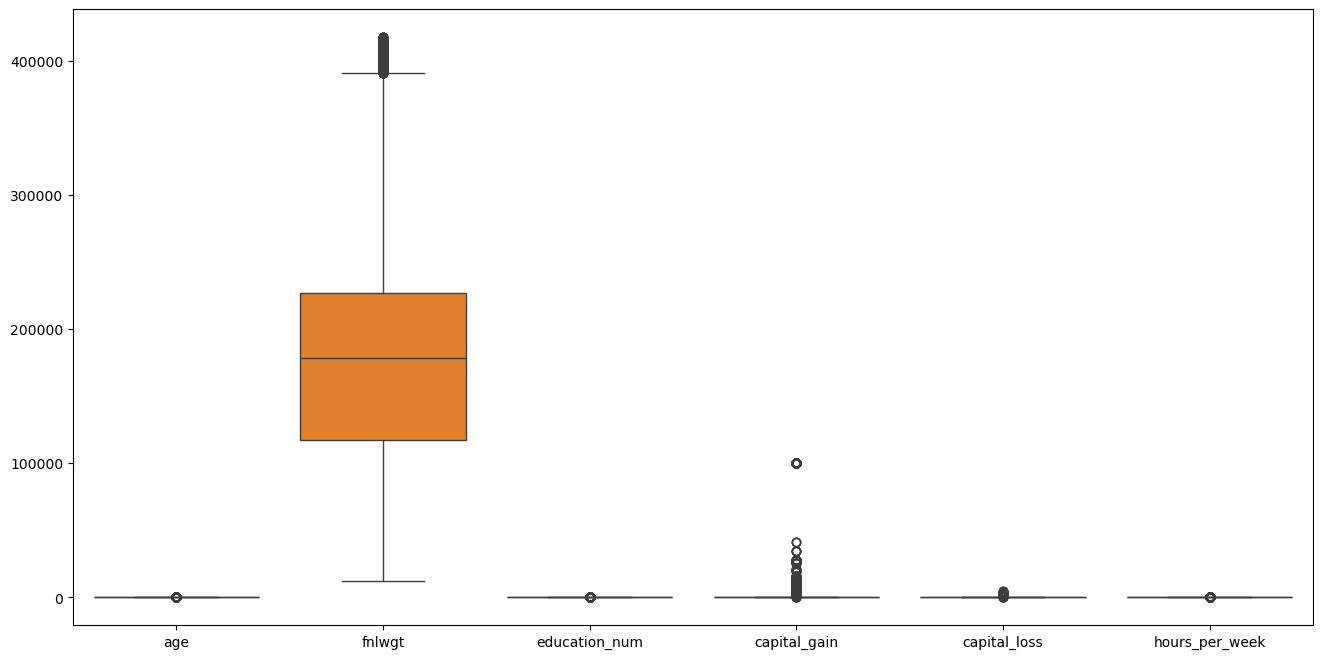

In [36]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

Observation: Since the rest of the columns can vary depending on person so I'd rather leave it as is.

In [38]:
data.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

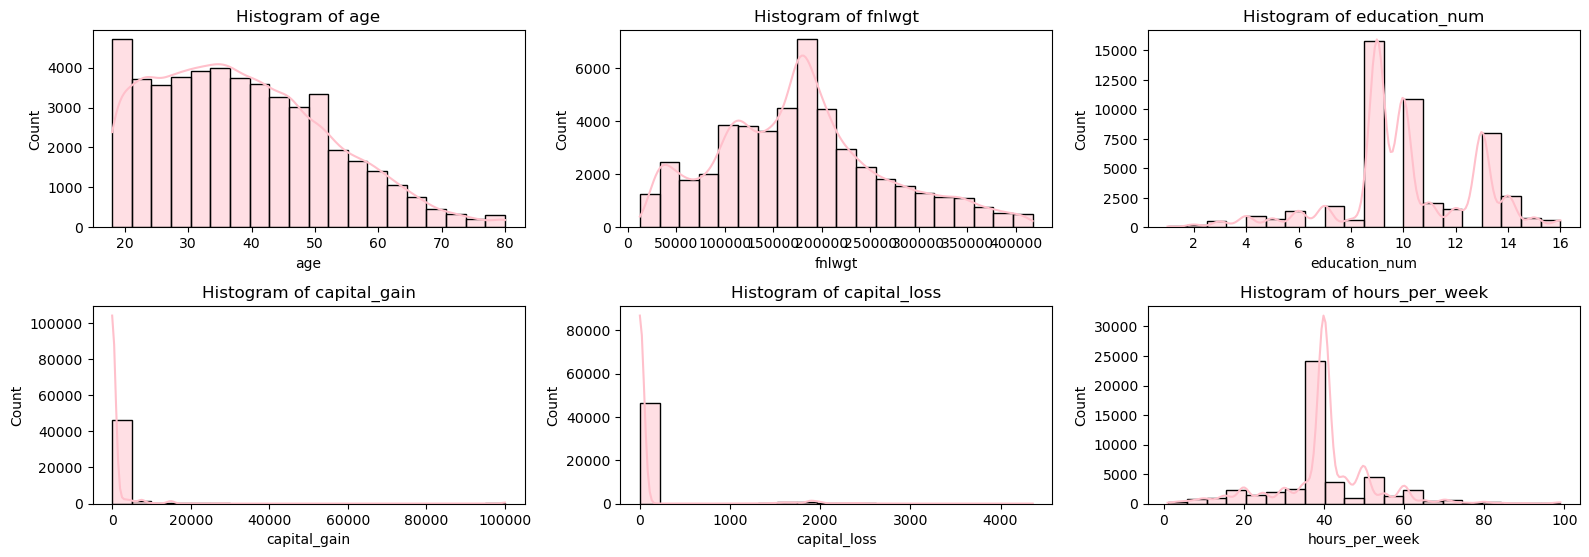

In [39]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data[col], kde=True, bins=20, color='pink')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()

Observation:
- age: The tail is on the left side, suggesting that there are more people in the lower age range.
- fnlwgt: A bell-shaped distribution generally indicates a normal distribution.
- education_num: Most people in the dataset have a certain level of education.
- capital_loan and capital_loss: Most if the values are low and the rest are sparse with few extreme values.
- hours_per_week: Most individuals work around a typical number of hours.

In [41]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [42]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [43]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [44]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [45]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [46]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [47]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [48]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [50]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ordinal encoding
education_mapping = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-acdm': 10,
    'Assoc-voc': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15}

data['education'] = data['education'].map(education_mapping)

# label encoding
le = LabelEncoder()
label_encode_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'native_country', 'income']

encoding_comparison_dict = {}

for column in label_encode_cols:
    data[column] = le.fit_transform(data[column])
    
    # a dictionary for comparison
    comparison = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_comparison_dict[column] = comparison

for col, comparison in encoding_comparison_dict.items():
    print(f"{col} encoding comparison:")
    for category, encoded_value in comparison.items():
        print(f"  {category} -> {encoded_value}")
    print("\n")

# one-hot encoding for 'race' and 'sex'
data = pd.get_dummies(data, columns=['race', 'sex']).astype(int)

workclass encoding comparison:
  Federal-gov -> 0
  Local-gov -> 1
  Never-worked -> 2
  Private -> 3
  Self-emp-inc -> 4
  Self-emp-not-inc -> 5
  State-gov -> 6
  Without-pay -> 7


marital_status encoding comparison:
  Divorced -> 0
  Married-AF-spouse -> 1
  Married-civ-spouse -> 2
  Married-spouse-absent -> 3
  Never-married -> 4
  Separated -> 5
  Widowed -> 6


occupation encoding comparison:
  Adm-clerical -> 0
  Armed-Forces -> 1
  Craft-repair -> 2
  Exec-managerial -> 3
  Farming-fishing -> 4
  Handlers-cleaners -> 5
  Machine-op-inspct -> 6
  Other-service -> 7
  Priv-house-serv -> 8
  Prof-specialty -> 9
  Protective-serv -> 10
  Sales -> 11
  Tech-support -> 12
  Transport-moving -> 13
  Unknown -> 14


relationship encoding comparison:
  Husband -> 0
  Not-in-family -> 1
  Other-relative -> 2
  Own-child -> 3
  Unmarried -> 4
  Wife -> 5


native_country encoding comparison:
  Cambodia -> 0
  Canada -> 1
  China -> 2
  Columbia -> 3
  Cuba -> 4
  Dominican-Republic -> 5


Observation: I chose one-hot encoding for race and sex since they are non-ordinal and unique. Education is ordinal data so i made sure the values are in correct order before encoding accordingly. The rest of the categoric values are encoded using label encoding and there are too many categories.

In [53]:
data.dtypes

age                        int32
workclass                  int32
fnlwgt                     int32
education                  int32
education_num              int32
marital_status             int32
occupation                 int32
relationship               int32
capital_gain               int32
capital_loss               int32
hours_per_week             int32
native_country             int32
income                     int32
race_Amer-Indian-Eskimo    int32
race_Asian-Pac-Islander    int32
race_Black                 int32
race_Other                 int32
race_White                 int32
sex_Female                 int32
sex_Male                   int32
dtype: object

In [54]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,6,77516,12,13,4,0,1,2174,0,40,38,0,0,0,0,0,1,0,1
1,50,5,83311,12,13,2,3,0,0,0,13,38,0,0,0,0,0,1,0,1
2,38,3,215646,8,9,0,5,1,0,0,40,38,0,0,0,0,0,1,0,1
3,53,3,234721,6,7,2,5,0,0,0,40,38,0,0,0,1,0,0,0,1
4,28,3,338409,12,13,2,9,5,0,0,40,4,0,0,0,1,0,0,1,0
5,37,3,284582,13,14,2,3,5,0,0,40,38,0,0,0,0,0,1,1,0
6,49,3,160187,4,5,3,7,1,0,0,16,22,0,0,0,1,0,0,1,0
7,52,5,209642,8,9,2,3,0,0,0,45,38,1,0,0,0,0,1,0,1
8,31,3,45781,13,14,4,9,1,14084,0,50,38,1,0,0,0,0,1,1,0
9,42,3,159449,12,13,2,3,0,5178,0,40,38,1,0,0,0,0,1,0,1


In [55]:
data.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.648371,3.099713,179635.805698,9.088215,10.078807,2.618077,6.440992,1.443472,1080.217688,87.595573,40.425886,36.455155,0.239414,0.009633,0.031092,0.095983,0.008321,0.854970,0.331543,0.668457
std,13.634454,1.111356,86314.463677,2.575226,2.570046,1.507877,4.329715,1.602571,7455.905921,403.209129,12.392729,6.037863,0.426730,0.097676,0.173569,0.294571,0.090842,0.352134,0.470773,0.470773
min,18.000000,0.000000,12285.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,117555.000000,8.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,178137.500000,9.000000,10.000000,2.000000,7.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,48.000000,3.000000,226883.000000,11.000000,12.000000,4.000000,10.000000,3.000000,0.000000,0.000000,45.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,7.000000,417668.000000,15.000000,16.000000,6.000000,14.000000,5.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
corr = data.select_dtypes(include='number').corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
age,1.000000,0.045768,-0.068222,0.030527,0.029752,-0.264841,0.007086,-0.263793,0.077383,0.056769,0.070887,-0.003011,0.231012,-0.014078,-0.011126,-0.017409,-0.033398,0.032568,-0.088165,0.088165
workclass,0.045768,1.000000,-0.027661,0.008557,0.007331,-0.020841,0.002886,-0.056085,0.031554,0.004160,0.042887,-0.004711,-0.000508,-0.025842,0.008791,-0.067302,-0.005174,0.060470,-0.066675,0.066675
fnlwgt,-0.068222,-0.027661,1.000000,-0.032681,-0.030721,0.027088,-0.004775,0.006421,-0.003809,0.002563,-0.010451,-0.056340,0.000094,-0.071654,-0.044341,0.093465,0.012279,-0.039622,-0.022684,0.022684
education,0.030527,0.008557,-0.032681,1.000000,0.994340,-0.070989,0.044101,-0.091560,0.125062,0.080125,0.144863,0.090067,0.332116,-0.025379,0.063655,-0.075441,-0.044492,0.050250,-0.010109,0.010109
education_num,0.029752,0.007331,-0.030721,0.994340,1.000000,-0.069859,0.045040,-0.090697,0.125219,0.080986,0.143915,0.089868,0.332802,-0.026539,0.064256,-0.074508,-0.044158,0.049410,-0.009364,0.009364
marital_status,-0.264841,-0.020841,0.027088,-0.070989,-0.069859,1.000000,0.050170,0.187770,-0.043924,-0.033790,-0.185444,-0.017244,-0.198855,-0.000208,0.017807,0.082763,0.015122,-0.081854,0.127505,-0.127505
occupation,0.007086,0.002886,-0.004775,0.044101,0.045040,0.050170,1.000000,-0.010882,0.008141,0.006818,-0.060451,-0.000521,0.007275,-0.001128,0.010883,0.004706,0.004323,-0.010103,-0.022017,0.022017
relationship,-0.263793,-0.056085,0.006421,-0.091560,-0.090697,0.187770,-0.010882,1.000000,-0.056543,-0.057243,-0.250319,-0.007111,-0.253175,0.026655,0.011735,0.137471,0.016184,-0.132352,0.579955,-0.579955
capital_gain,0.077383,0.031554,-0.003809,0.125062,0.125219,-0.043924,0.008141,-0.056543,1.000000,-0.031475,0.082152,0.008117,0.223047,-0.007159,0.011030,-0.021492,-0.001192,0.014835,-0.047127,0.047127
capital_loss,0.056769,0.004160,0.002563,0.080125,0.080986,-0.033790,0.006818,-0.057243,-0.031475,1.000000,0.054431,0.006494,0.147542,-0.012180,0.003593,-0.021006,-0.005597,0.020624,-0.045517,0.045517


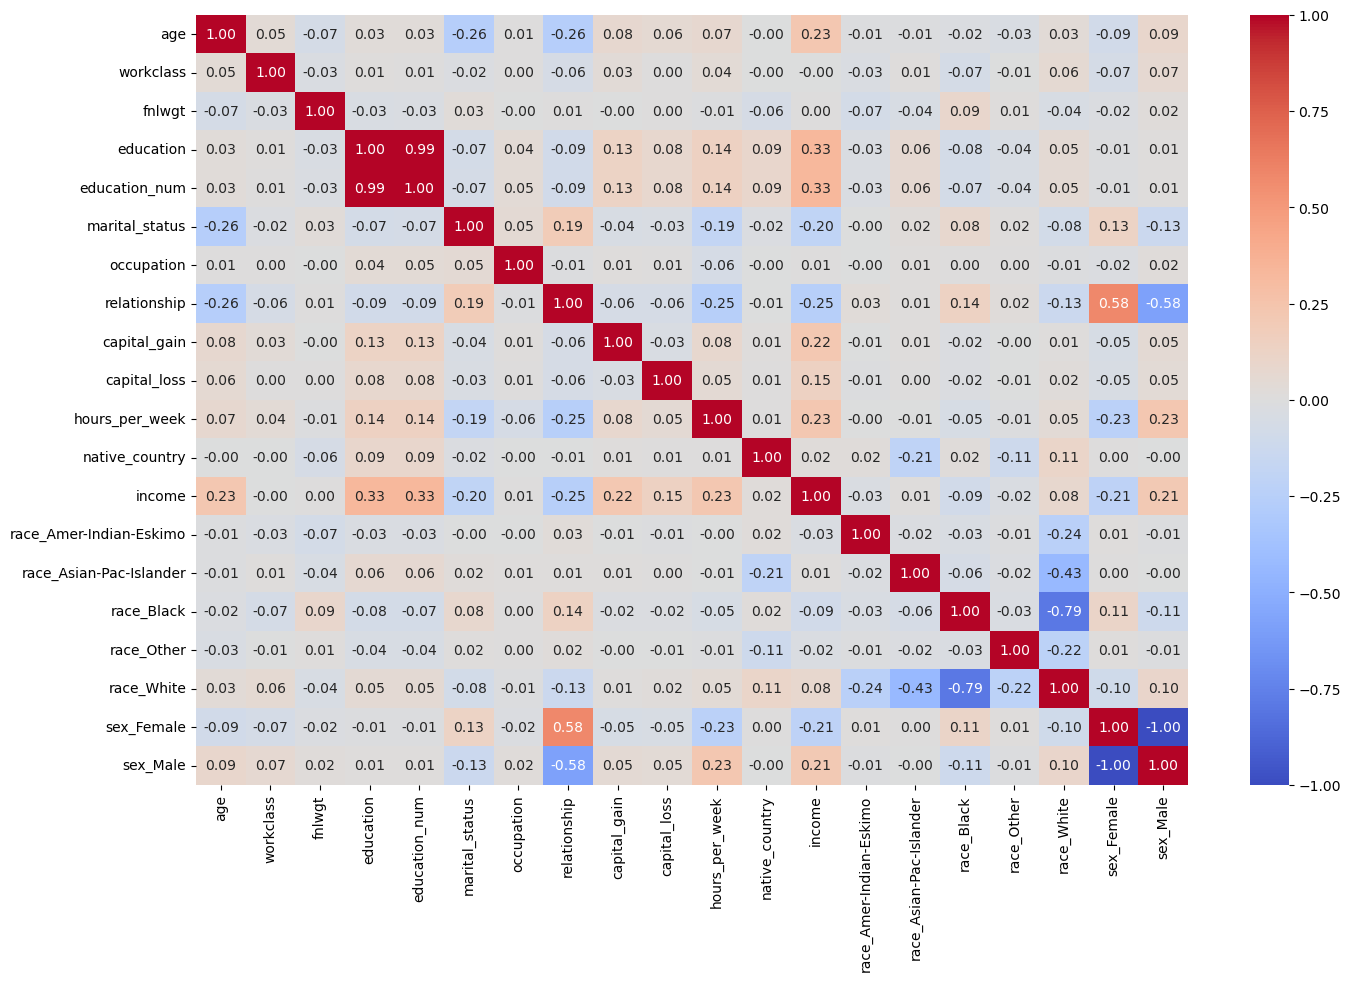

In [155]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Observation: The highest correlation coefficient of 0.99 is present between education_num and education. The next highest of 0.58 is present between sex_Female and relationship.

In [164]:
correlation_matrix = data.corr()

income_correlation = correlation_matrix['income']
income_correlation

age                        0.231012
workclass                 -0.000508
fnlwgt                     0.000094
education                  0.332116
education_num              0.332802
marital_status            -0.198855
occupation                 0.007275
relationship              -0.253175
capital_gain               0.223047
capital_loss               0.147542
hours_per_week             0.227664
native_country             0.020169
income                     1.000000
race_Amer-Indian-Eskimo   -0.028287
race_Asian-Pac-Islander    0.012677
race_Black                -0.090524
race_Other                -0.024957
race_White                 0.083763
sex_Female                -0.214639
sex_Male                   0.214639
Name: income, dtype: float64

Observation:
- education_num, education: correlation = 0.33

  As the education level increases, the likelihood of having a higher income also increases.
- hours_per_week: correlation = 0.23

  There is a moderate positive correlation between hours_per_week and income. People who work more hours are more likely to have a higher income.
- relationship: correlation = 0.25

  Individuals who are married or in relationships might have a slightly lower likelihood of earning higher incomes in this dataset.
- sex_Female: correlation = 0.21

  Females are slightly less likely to have a higher income compared to males.

In [57]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,6,77516,12,13,4,0,1,2174,0,40,38,0,0,0,0,0,1,0,1
1,50,5,83311,12,13,2,3,0,0,0,13,38,0,0,0,0,0,1,0,1
2,38,3,215646,8,9,0,5,1,0,0,40,38,0,0,0,0,0,1,0,1
3,53,3,234721,6,7,2,5,0,0,0,40,38,0,0,0,1,0,0,0,1
4,28,3,338409,12,13,2,9,5,0,0,40,4,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,12,13,0,9,1,0,0,36,38,0,0,0,0,0,1,1,0
48838,64,3,321403,8,9,6,14,2,0,0,40,38,0,0,0,1,0,0,0,1
48839,38,3,374983,12,13,2,9,0,0,0,50,38,0,0,0,0,0,1,0,1
48840,44,3,83891,12,13,0,0,3,5455,0,40,38,0,0,1,0,0,0,0,1


BOXPLOT FOR CATEGORIC VALUES

In [59]:
X = data.drop('income', axis=1)
Y = data['income']